# Machine Learning Project : Taxi Trip Duration Prediction :
---

- ### Write a program that takes New York City taxi ride data as input and uses machine learning algorithms to predict the duration of a ride. The program should be able to handle various features, such as pickup and drop-off locations, date and time of day, etc., and use this information to train multiple machine learning models.

- ### Your task is to compare the accuracy of different models for predicting ride durations. Once you have chosen an algorithm with good performance, your next step would be training the model using available data and then evaluating its performance on test set.
---
# Importing necessary modules :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Loading the dataset into pandas dataframe :

In [ ]:
nyc_df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/nyc_taxi.csv')
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Checking the details of the data :

In [ ]:
nyc_df.shape

(1458644, 11)

In [ ]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Checking for missing values :

In [ ]:
nyc_df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


### So there is no null values in our dataset.
---
# Converting the **pickup_datetime** and **dropoff_datetime** columns in the DataFrame **nyc_df** to datetime objects :

In [ ]:
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## As we can see below - the datatype of the 2 columns are datetime now.

In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Now **'trip_duration'** is our dependent/target variable.
# Generating a distribution plot of the log-transformed trip durations :

<ipython-input-11-3c9cbe570a9b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(nyc_df['trip_duration'])).set(title = 'Distribution plot with Log')


[Text(0.5, 1.0, 'Distribution plot with Log')]

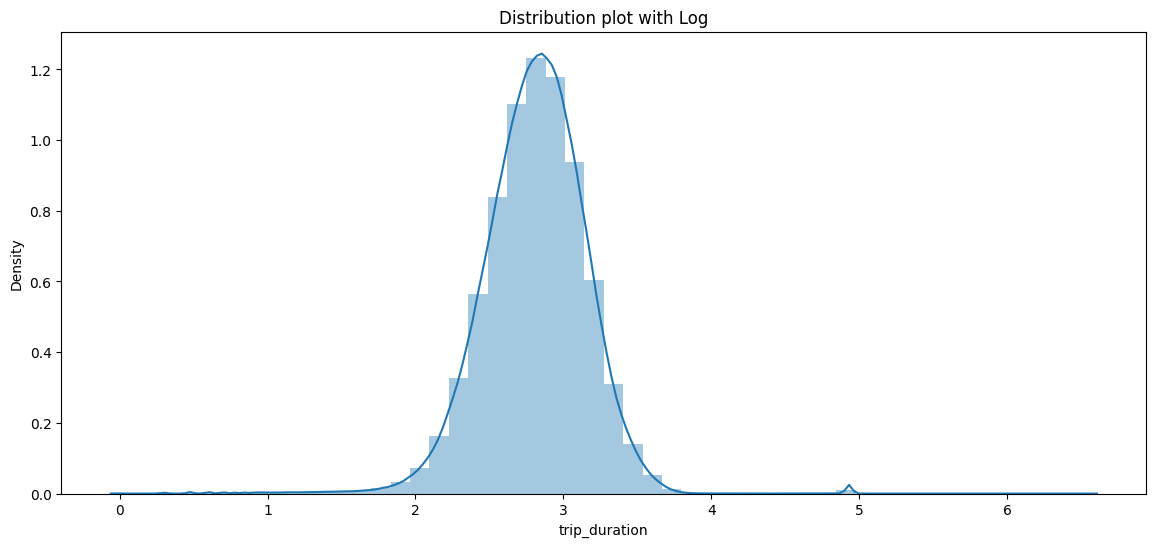

In [ ]:
plt.figure(figsize = (14,6))
sns.distplot(np.log10(nyc_df['trip_duration'])).set(title = 'Distribution plot with Log')

# Below code iterates through the columns of the DataFrame's descriptive statistics and creates box plots for the numeric columns :

vendor_id


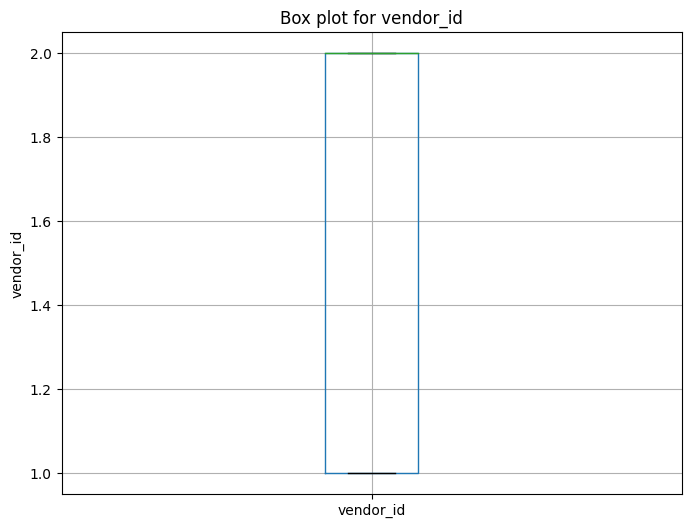

pickup_datetime
Skipping box plot for pickup_datetime as it is not numeric.
dropoff_datetime
Skipping box plot for dropoff_datetime as it is not numeric.
passenger_count


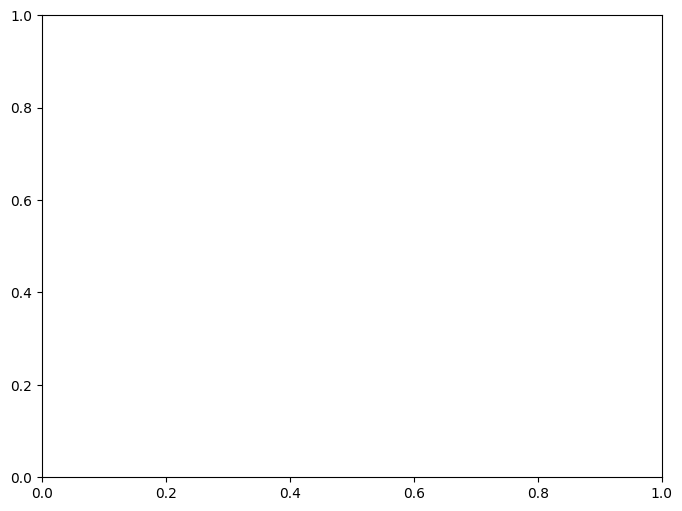

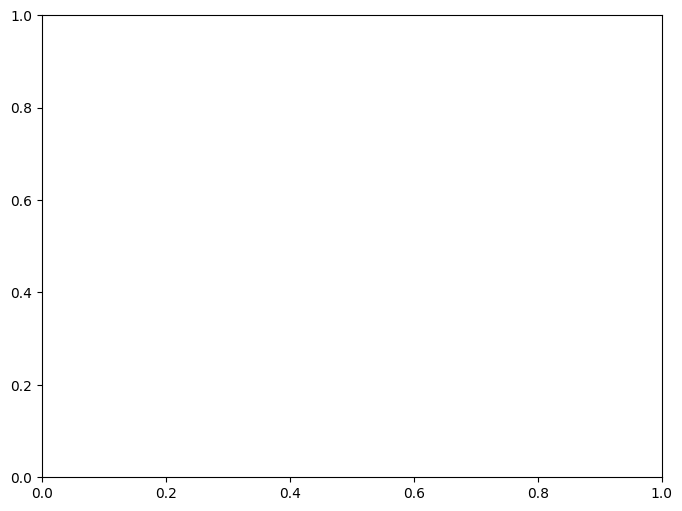

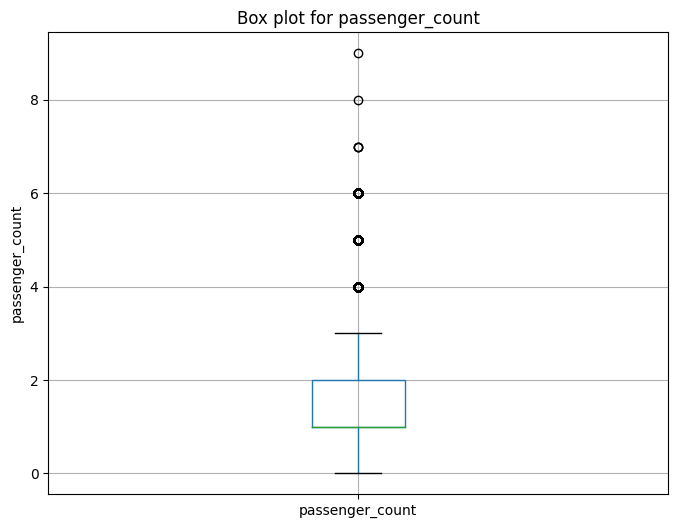

pickup_longitude


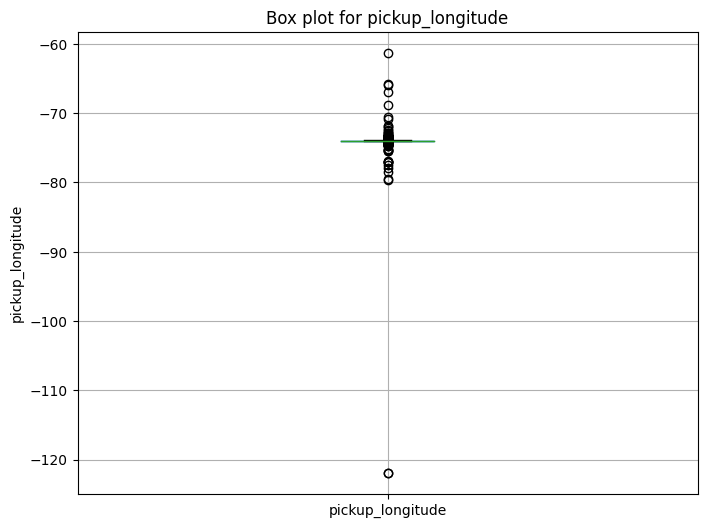

pickup_latitude


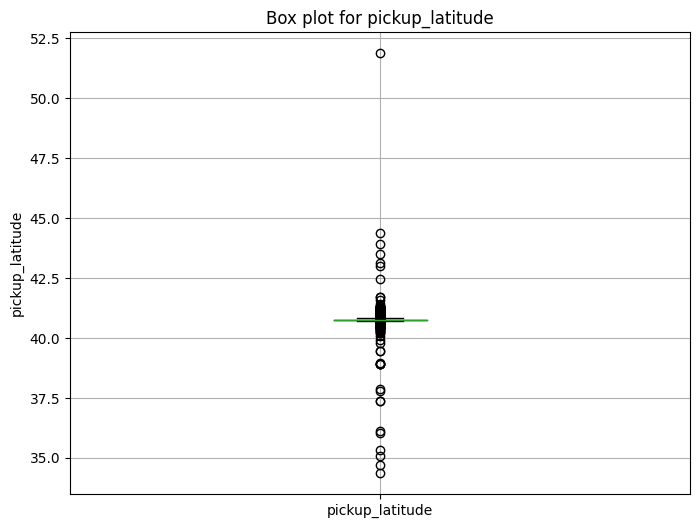

dropoff_longitude


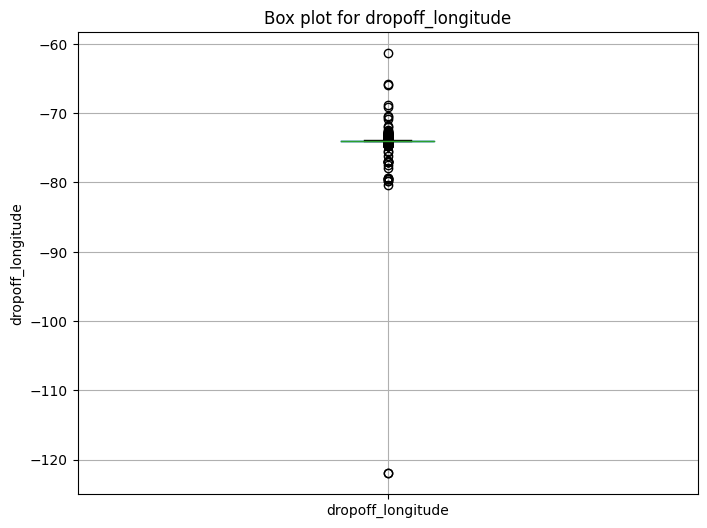

dropoff_latitude


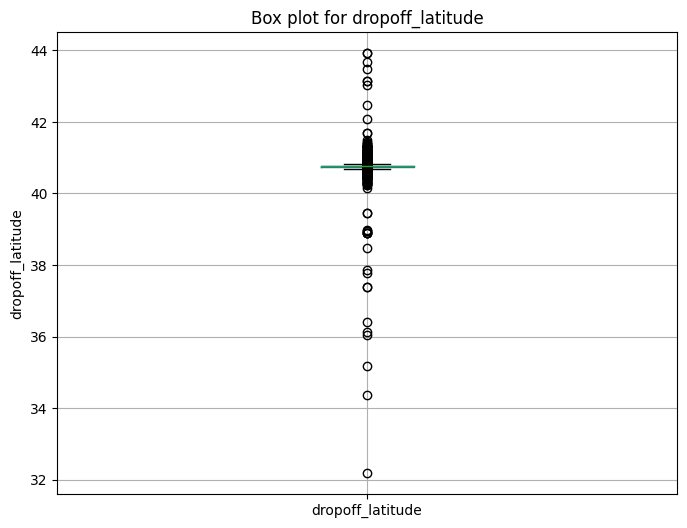

trip_duration


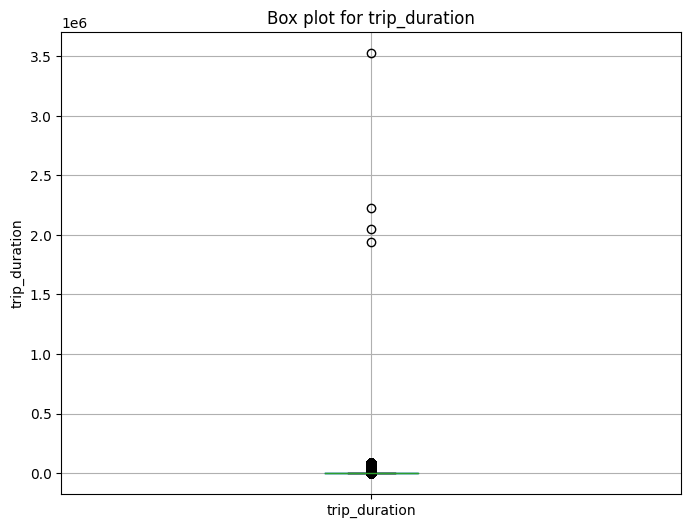

In [ ]:
for col in nyc_df.describe().columns :
    figr = plt.figure(figsize = (8,6))
    print(col)
    ax = figr.gca()
    # Checking if the column is numeric before creating a boxplot :
    if pd.api.types.is_numeric_dtype(nyc_df[col]):
        nyc_df.boxplot(column = col, ax = ax)
        ax.set_ylabel(col)
        plt.title(f"Box plot for {col}")
        plt.show()
    else:
        print(f"Skipping box plot for {col} as it is not numeric.")

## The box plots we generated provide a visual representation of the distribution of our data and can help us identify potential outliers.

- ### Here's a breakdown of insights we can glean from each box plot:

- ### **passenger_count :** Most rides have 1-2 passengers. There are some outliers with very high passenger counts.
- ### **trip_duration :** The box is quite compressed and there's a long tail, indicating a wide range of trip durations with many outliers on the higher end.
- ### **pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude :** These plots show the geographical spread of pickup and dropoff locations. Outliers here could represent trips that start or end far outside the usual area.
---
# Feature Engeening :
- ### Here we will see wheather we need to create any new variables, what kind of features we want in our prediction.
- ### So below we want our data should have a pickup and dropoff day variable so that we can observe how the pickup and dropoff changes day to day and which days of the week are the bussiest.
---
# Extracting the day name from the pickup and dropoff datetime and creates new columns named **pickup_day** and **dropoff_day** respectively :

In [ ]:
nyc_df['pickup_day'] = nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day'] = nyc_df['dropoff_datetime'].dt.day_name()
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


# Below code generates two count plots to visualize the number of taxi pickups and dropoffs for each day of the week :

Text(0.5, 1.0, 'Number of dropoffs done on each day of the week')

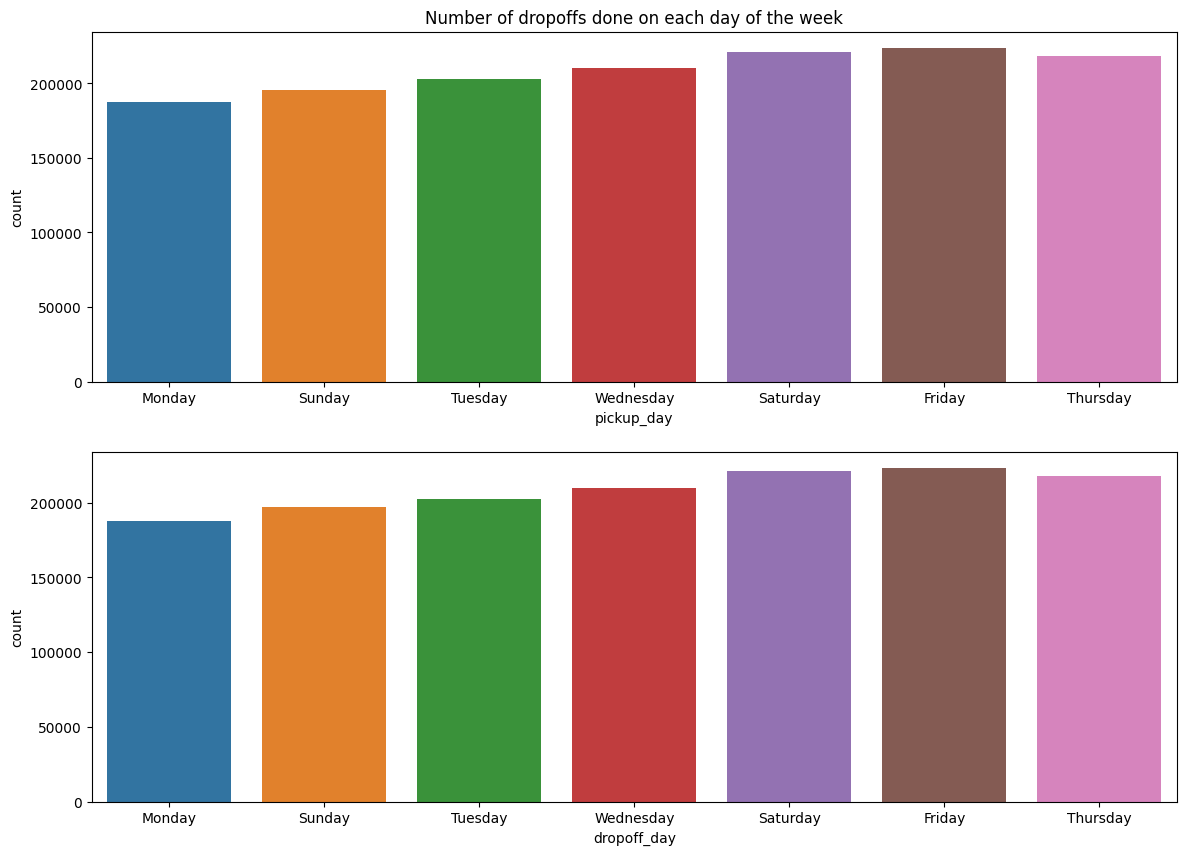

In [ ]:
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14,10))

sns.countplot(x = 'pickup_day', data = nyc_df, ax = ax[0], hue = 'pickup_day')
ax[0].set_title('Number of Pickups done on each day of the week')

sns.countplot(x = 'dropoff_day', data = nyc_df, ax = ax[1], hue = 'dropoff_day')
ax[0].set_title('Number of dropoffs done on each day of the week')

### The plots show that Friday is the busiest day for both pickups and dropoffs, while Monday is the least busy.
---
# Visualizing the distribution of taxi pickup and dropoff times throughout the day using histograms :


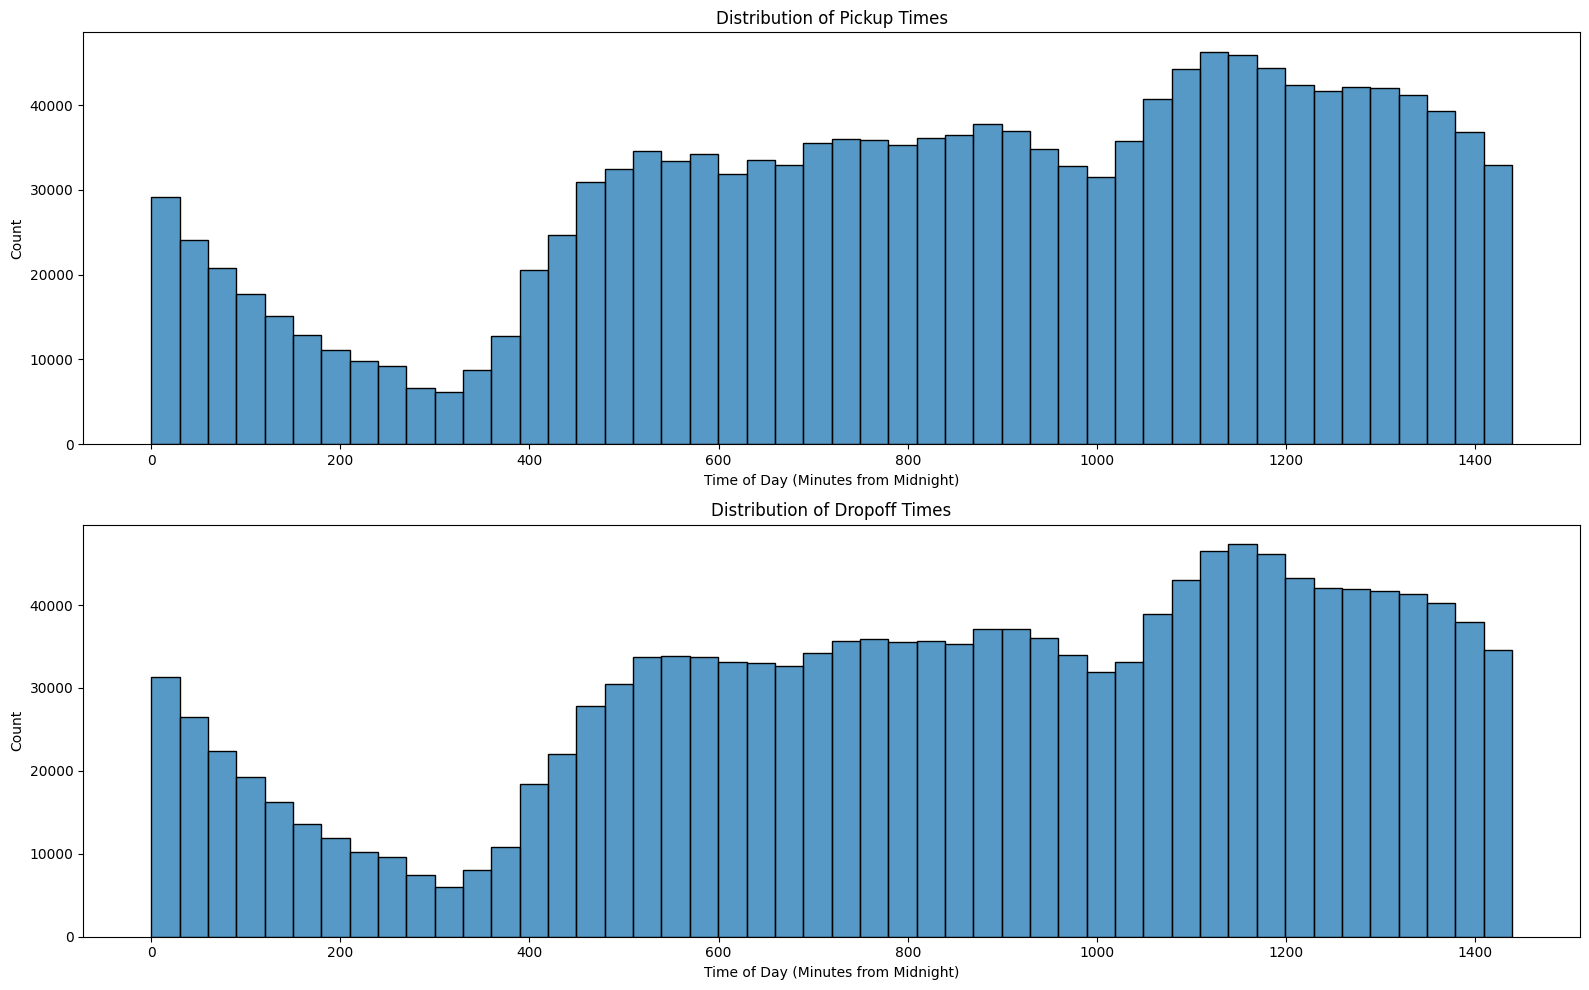

In [ ]:
# Creating a figure with two subplots (one for pickup times and one for dropoff times)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Calculating pickup time in minutes from midnight
pickup_time_minutes = nyc_df['pickup_datetime'].dt.hour * 60 + nyc_df['pickup_datetime'].dt.minute

# Creating a histogram of pickup times with 48 bins (one for every half hour)
sns.histplot(pickup_time_minutes, bins = 24*2, ax=axes[0])

# Setting the title of the first subplot
axes[0].set_title('Distribution of Pickup Times')

# Setting the x-axis label of the first subplot
axes[0].set_xlabel('Time of Day (Minutes from Midnight)')

# Calculating dropoff time in minutes from midnight
dropoff_time_minutes = nyc_df['dropoff_datetime'].dt.hour * 60 + nyc_df['dropoff_datetime'].dt.minute

# Creating a histogram of dropoff times with 48 bins
sns.histplot(dropoff_time_minutes, bins = 24*2, ax = axes[1])

# Setting the title of the second subplot
axes[1].set_title('Distribution of Dropoff Times')

# Setting the x-axis label of the second subplot
axes[1].set_xlabel('Time of Day (Minutes from Midnight)')

# Adjusting the layout of the subplots to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

## The histograms you generated show the distribution of taxi pickup and dropoff times throughout the day.

- ### **Pickup times :** There is a peak in pickup times during the evening hours, with a gradual increase starting from the morning and a decrease after the peak. There is also a smaller peak during the morning rush hour.

- ### **Dropoff times :** The distribution of dropoff times is similar to that of pickup times, with a peak during the evening hours and a smaller peak during the morning rush hour.

- ### These histograms suggest that taxi demand is highest during the evening hours and that there is also significant demand during the morning rush hour.
---
# Converting categorical columns **'store_and_fwd_flag'**, **'pickup_day'**, and **'dropoff_day'** into numerical representations using LabelEncoder :

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
nyc_df['store_and_fwd_flag'] = encoder.fit_transform(nyc_df['store_and_fwd_flag'])
nyc_df['pickup_day'] = encoder.fit_transform(nyc_df['pickup_day'])
nyc_df['dropoff_day'] = encoder.fit_transform(nyc_df['dropoff_day'])

In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  int64         
 12  dropoff_day         1458644 non-null  int64         
dtypes: datetime6

# Calculating the correlation matrix of numeric columns in **nyc_df** and displays it as a heatmap :

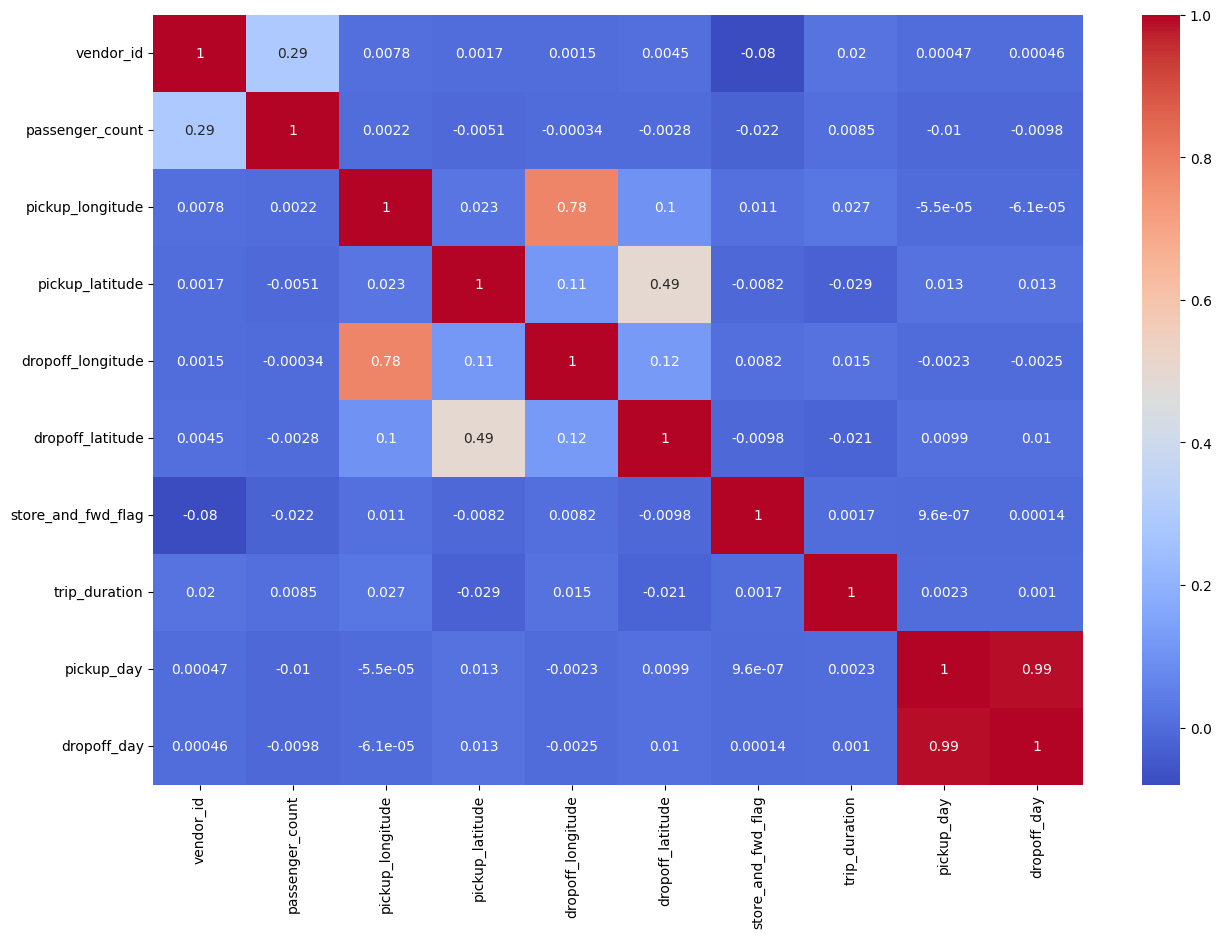

In [ ]:
correlation_matrix = nyc_df.corr(numeric_only = True)

plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## The heatmap visualizes the correlation between numerical features in the NYC taxi dataset.

- ### **Trip Duration :** It has a moderate positive correlation with trip_distance which is expected as longer trips take more time. It also has a slight negative correlation with store_and_fwd_flag suggesting that trips where data was stored and forwarded later might be slightly shorter.
- ### **Pickup/Dropoff locations :** There are some correlations between pickup and dropoff longitudes and latitudes, indicating that certain pickup/dropoff locations are related.
- ### **Other :** pickup_day and dropoff_day show a strong correlation, as expected, since most trips likely start and end on the same day.
---
- ### But to predict **Trip Duration** we also need distance.
#

In [ ]:
!pip install haversine

# Defining a function calc_dist that calculates the distance between two points using their latitude and longitude :

In [ ]:
from haversine import haversine
def calc_dist(df) :
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

## Calculating the distance between pickup and dropoff points for each row in the DataFrame **nyc_df** using the **calc_dist** function and stores it in the new column **"distance"** :

In [ ]:
nyc_df["distance"] = nyc_df.apply(lambda x : calc_dist(x), axis = 1)

# Calculating correlation matrix again :

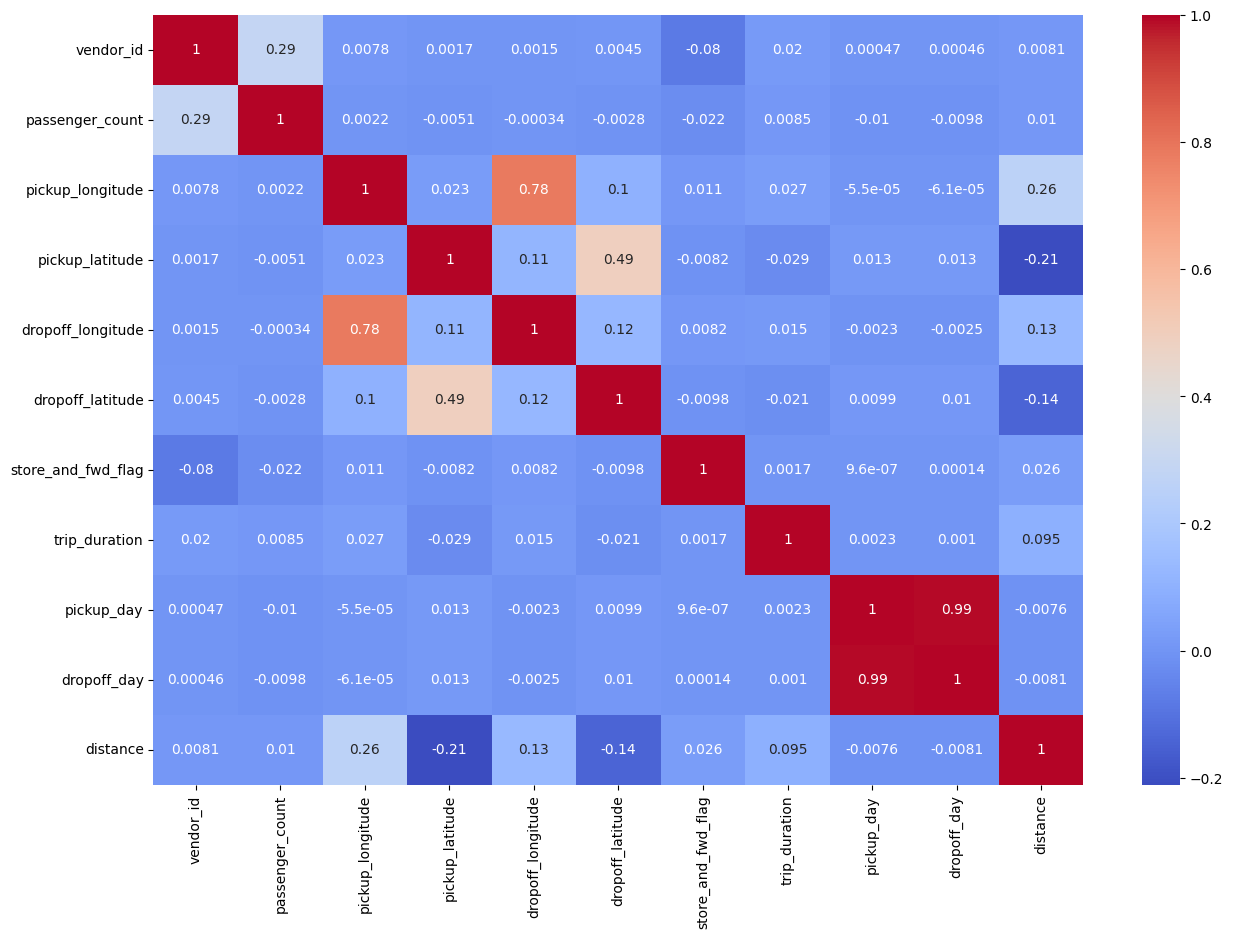

In [ ]:
correlation_matrix = nyc_df.corr(numeric_only = True)

plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## We can see the variable 'distance' added here.
- ### The **distance** variable has the highest positive correlation with **trip_duration**, which is expected as the longer the distance, the longer the trip duration. It also has a slight positive correlation with **pickup_longitude** and **dropoff_longitude**. This indicates that trips with longer distances tend to have different pickup and dropoff locations compared to shorter trips.
---
# Defining features (x) and target variable (y) :
- ### We will drop those features which are not important for our prediction.

In [ ]:
x = nyc_df.drop(['id','pickup_datetime','dropoff_datetime'], axis = 1)
y = nyc_df['trip_duration']

# Splitting our data into training and testing sets :

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Checking the shape of training and testing sets :

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1166915, 11) (1166915,)
(291729, 11) (291729,)


# Feature scaling for Linear Regression :

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializes the scaler :
scaler = StandardScaler()

# Fits and transforms the training data :
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data (using the same scaler)
x_test_scaled = scaler.transform(x_test)

# Linear Regression :

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
print("Linear Regression Accuracy :", lr.score(x_test_scaled, y_test))

Linear Regression Accuracy : 1.0


## So Linear Regression model is perfect for our data.
---
# Decision Tree Regressor :

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)
print("Decision Tree Regressor Accuracy :", dtr.score(x_test, y_test))

Decision Tree Regressor Accuracy : 0.995557872187306


## Defining a function to calculate and print **MSE, RMSE, and R2**, then plots the first 100 predicted and actual values :

In [ ]:
from matplotlib import legend

def EvaluationMetrics(yt, yp) :
    MSE = mean_squared_error(yt, yp)
    RMSE = (np.sqrt(MSE))
    R2 = r2_score(yt, yp)

    print("MSE :",MSE,"RMSE :",RMSE,"R2_Score :",R2)
    plt.figure(figsize = (18,6))
    plt.plot((np.array(yp)[:100]), color='blue')
    plt.title('Predicted Time Duration')
    plt.figure(figsize = (18,6))
    plt.plot((np.array(yt)[:100]), color = 'red')
    plt.title('Actual Time Duration')

## Calling the above defined function to calculate and print MSE, RMSE, and R2, then plots the first 100 predicted and actual value :

MSE : 108744.1641900531 RMSE : 329.76380060590805 R2_Score : 0.995557872187306


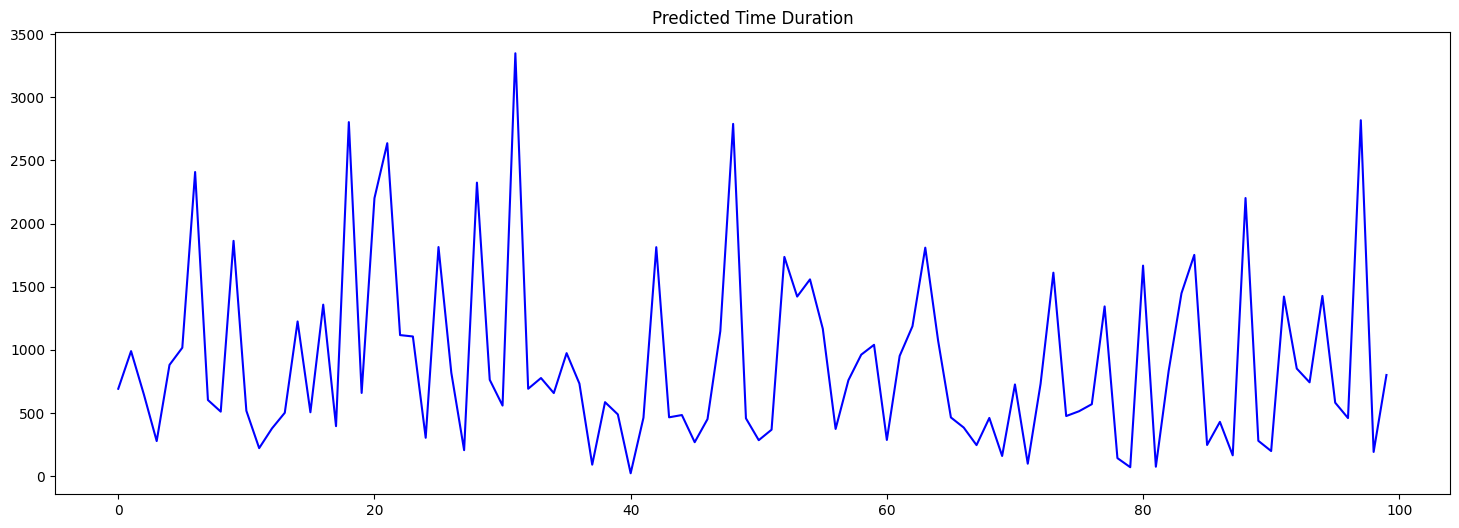

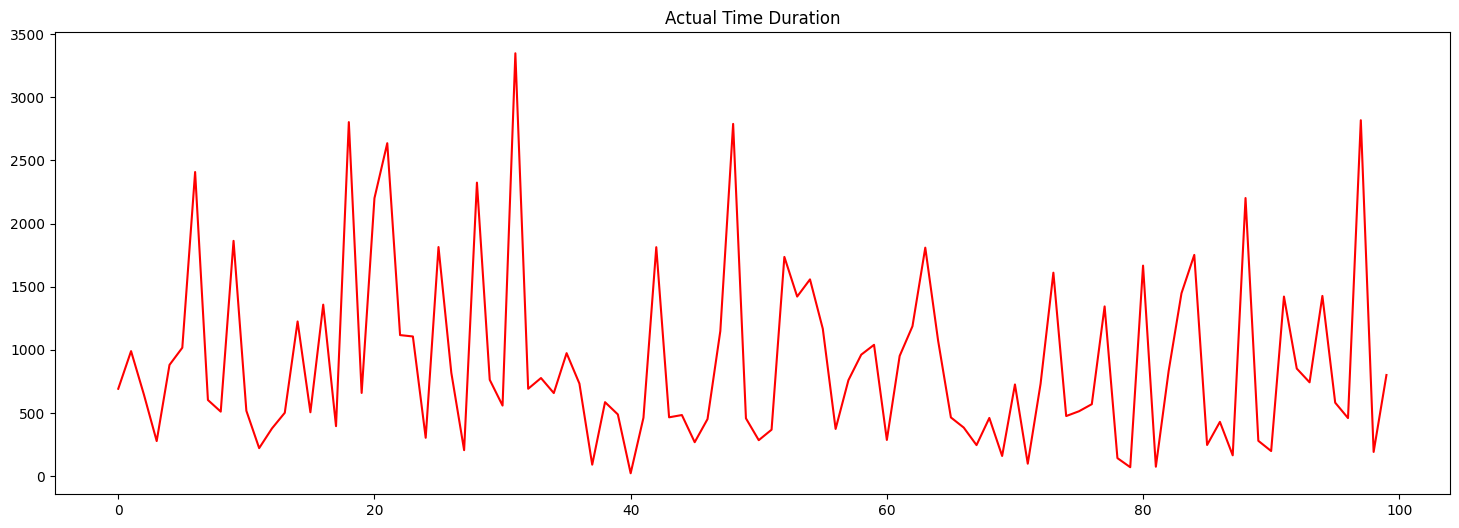

In [ ]:
EvaluationMetrics(y_test, y_pred_dtr)

### The Decision Tree Regressor model has an MSE of 108744.16, an RMSE of 329.76, and an R-squared of 0.995. This indicates that the model fits the data very well, as indicated by the very high R-squared. The MSE and RMSE values are relatively low, which suggests that the model's predictions are close to the actual values.
---
# Random Forest Regressor :

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
print("Random Forest Regressor Accuracy :", rfr.score(x_test, y_test))

Random Forest Regressor Accuracy : 0.9825912819921596
